In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df=pd.read_csv("crime_data.csv")

In [16]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
df.shape

(50, 5)

In [18]:
df.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [19]:
col="State"
df.rename(columns={'Unnamed: 0':col}, inplace=True)

In [20]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [12]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [24]:
# KMeans clustering on the unscaled data (before scaling)
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["Murder", "Assault"]])
df['Cluster'] = y_predicted


#this will make our data relatively closer 
#after scaling it will be ore acurately closer 
#so this is also a good pra ctice

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [25]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]

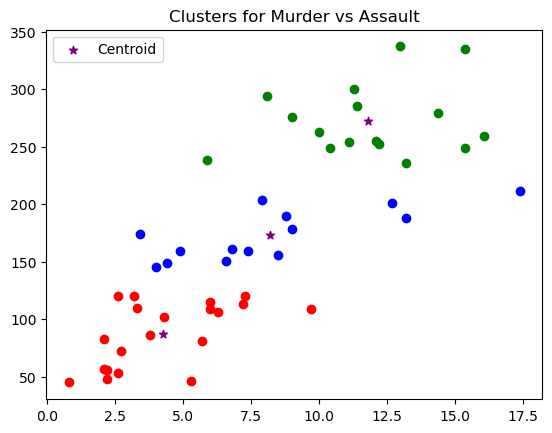

In [26]:
plt.scatter(df1.Murder, df1.Assault, color='green')
plt.scatter(df2.Murder, df2.Assault, color="red")
plt.scatter(df3.Murder, df3.Assault, color="blue")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')
plt.legend()
plt.title('Clusters for Murder vs Assault')
plt.show()

In [27]:
# Now, apply StandardScaler for scaling the data
scaler = StandardScaler()
X = df[['Murder', 'Assault', 'UrbanPop', 'Rape']]
X_scaled = scaler.fit_transform(X)

In [28]:
# Update the dataframe with the scaled values
df_scaled = df.copy()
df_scaled[['Murder', 'Assault', 'UrbanPop', 'Rape']] = X_scaled

In [29]:
# Perform clustering on scaled data
km = KMeans(n_clusters=3)
y_predicted_scaled = km.fit_predict(df_scaled[["Murder", "Assault"]])
df_scaled['Cluster'] = y_predicted_scaled

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [30]:
# Visualize the clusters (Murder vs Assault) after scaling
df1_scaled = df_scaled[df_scaled.Cluster == 0]
df2_scaled = df_scaled[df_scaled.Cluster == 1]
df3_scaled = df_scaled[df_scaled.Cluster == 2]

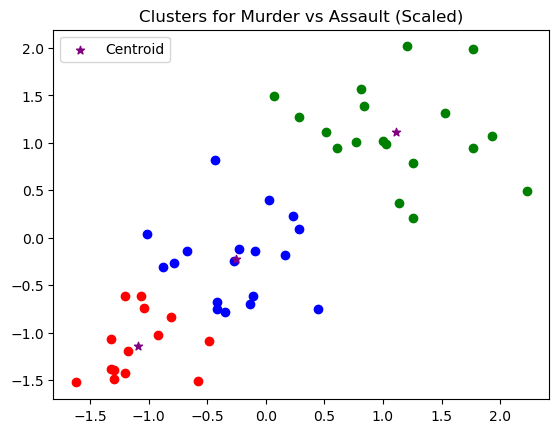

In [32]:
plt.scatter(df1_scaled.Murder, df1_scaled.Assault, color='green')
plt.scatter(df2_scaled.Murder, df2_scaled.Assault, color="red")
plt.scatter(df3_scaled.Murder, df3_scaled.Assault, color="blue")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')
plt.legend()
plt.title('Clusters for Murder vs Assault (Scaled)')
plt.show()

In [33]:
# Repeat clustering for different pairs of features
# Clustering for Murder vs Rape
y_predicted_scaled = km.fit_predict(df_scaled[["Murder", "Rape"]])
df_scaled['Cluster'] = y_predicted_scaled

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
df1_scaled = df_scaled[df_scaled.Cluster == 0]
df2_scaled = df_scaled[df_scaled.Cluster == 1]
df3_scaled = df_scaled[df_scaled.Cluster == 2]

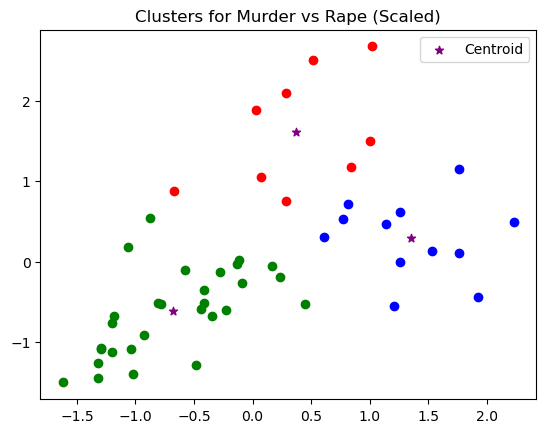

In [35]:
plt.scatter(df1_scaled.Murder, df1_scaled.Rape, color='green')
plt.scatter(df2_scaled.Murder, df2_scaled.Rape, color="red")
plt.scatter(df3_scaled.Murder, df3_scaled.Rape, color="blue")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')
plt.legend()
plt.title('Clusters for Murder vs Rape (Scaled)')
plt.show()

In [36]:
# Clustering for Assault vs Rape
y_predicted_scaled = km.fit_predict(df_scaled[["Assault", "Rape"]])
df_scaled['Cluster'] = y_predicted_scaled

C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\viren\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


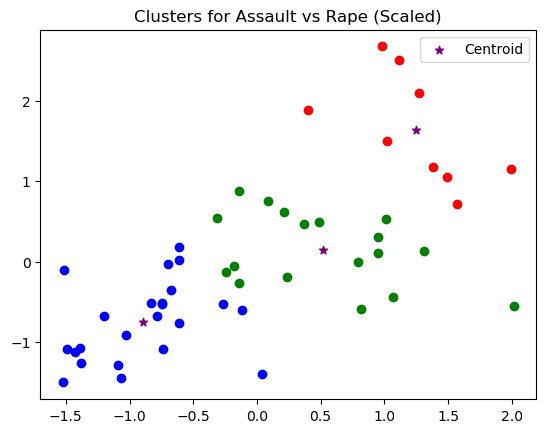

In [37]:
df1_scaled = df_scaled[df_scaled.Cluster == 0]
df2_scaled = df_scaled[df_scaled.Cluster == 1]
df3_scaled = df_scaled[df_scaled.Cluster == 2]

plt.scatter(df1_scaled.Assault, df1_scaled.Rape, color='green')
plt.scatter(df2_scaled.Assault, df2_scaled.Rape, color="red")
plt.scatter(df3_scaled.Assault, df3_scaled.Rape, color="blue")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='Centroid')
plt.legend()
plt.title('Clusters for Assault vs Rape (Scaled)')
plt.show()